# Chronological analysis
Generates __Figure 2__ in the manuscript.

In [36]:
rm(list= ls())

In [37]:
library(dplyr)
library(ggplot2)
library(binom)

In [38]:
results= read.csv2(file.path('Data', 'results_with_estimates.csv'), sep=';', dec='.', stringsAsFactors=FALSE)
results$Observer <- as.factor(results$Observer)

paintings <- read.csv2(file.path('Data', 'paintings with estimates.csv'), sep=';', dec='.', stringsAsFactors=FALSE)

## Defining common bins to be used for every chronological plot

In [40]:
# common bins
time.window <- c(1000, 2000)
bins.N <- 40
bin.width <- diff(time.window)/bins.N
bins= seq(time.window[1], time.window[2], length.out = bins.N+1)

i.larger.bins <- seq(1, length(bins), length.out = 11)

## Paintings count
Figure 2A in the manuscript.

Warning message:
"Removed 1 rows containing missing values (geom_point)."Warning message:
"Removed 1 rows containing missing values (geom_path)."

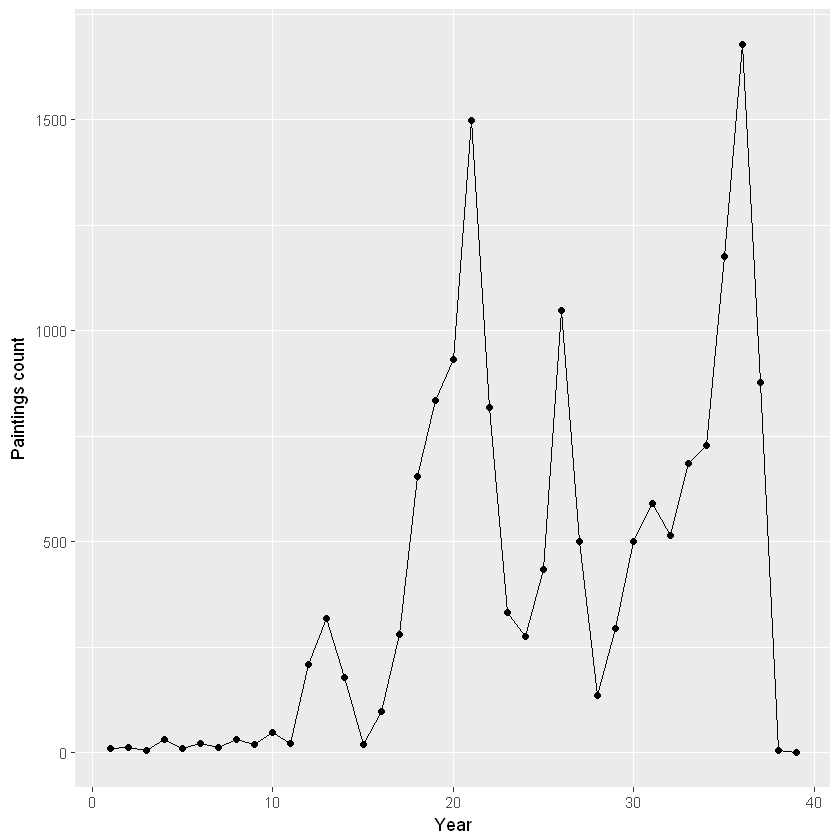

In [41]:
# computing mean estimate for each painting
painting.response <- results %>%
    dplyr::filter(year_unambiguous>1000) %>%
    dplyr::mutate(year= year_unambiguous,
                        estimate.given= Confidence>0)

# binning paintings in time
painting.response$year.bin <- cut(painting.response$year, breaks = bins, labels =  FALSE)

bin.counts <- painting.response %>%
    group_by(year.bin) %>%
    summarise(count= n())

# plotting
count.plot <- ggplot(data= bin.counts, aes(x= year.bin, y= count))+
    geom_point()+
    geom_line()+
    xlab('Year') + 
    ylab('Paintings count')+
    theme(panel.grid.minor.x = element_blank())
print(count.plot)

## Proportion of paintings with an estimate
Figure 2B in manuscript

Warning message:
"Removed 1 rows containing missing values (geom_rect)."Warning message:
"Removed 1 rows containing missing values (geom_path)."

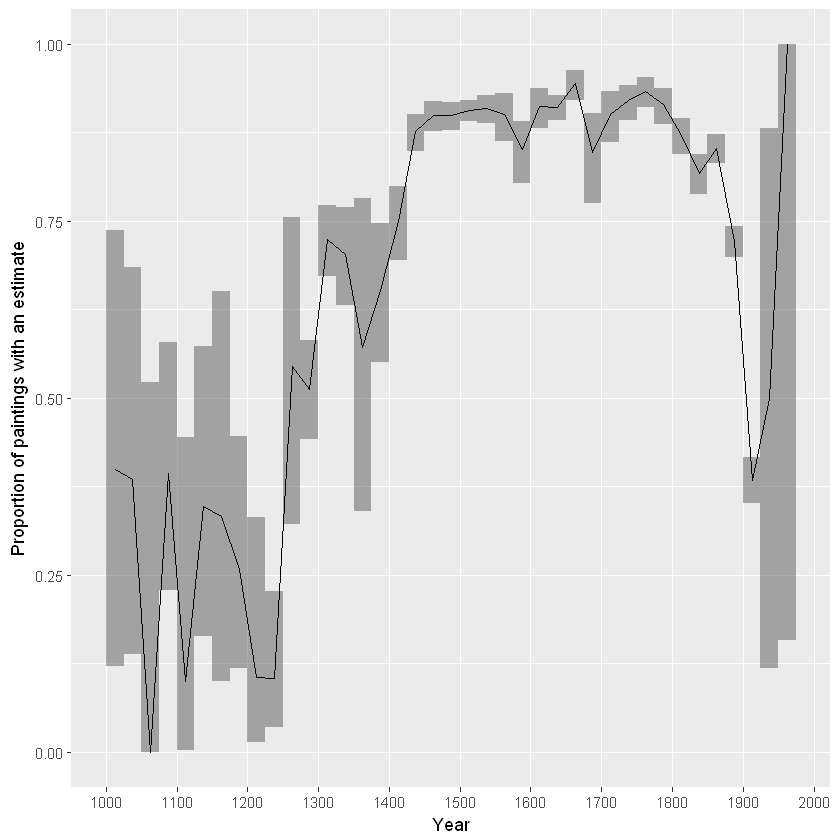

In [42]:
# computing mean estimate for each painting
painting.response <- results %>%
    dplyr::filter(year_unambiguous>1000) %>%
    dplyr::mutate(year= year_unambiguous,
                        estimate.given= Confidence>0)

# binning paintings in time
painting.response$year.bin <- cut(painting.response$year, breaks = bins, labels =  FALSE)

# computing an binomial proportion and CI for each bin
with.an.estimate <- painting.response %>%
    dplyr::group_by(year.bin) %>%
    dplyr::summarize(count= sum(estimate.given),
                     est.mean= count/n(),
                     est.ci.lo= binom::binom.exact(count, n())$lower,
                     est.ci.hi= binom::binom.exact(count, n())$upper)

# plotting
estimate.proportion.plot <- ggplot(data= with.an.estimate, aes(x= year.bin, y= est.mean, ymin= est.ci.lo, ymax= est.ci.hi))+
    geom_rect(aes(xmin= year.bin-0.5, xmax= year.bin+0.5), alpha= 0.5)+
    geom_line()+
    scale_x_continuous(breaks= i.larger.bins-0.5, labels = bins[i.larger.bins])+
    xlab('Year') + 
    ylab('Proportion of paintings with an estimate')+
    theme(panel.grid.minor.x = element_blank())

print(estimate.proportion.plot)
# ggsave(file="Generated figures/Chronology - proportion with estimate.pdf", plot= estimate.proportion.plot, width= 14, height= 6, units = 'cm')

## Participants confidence
Figure 2C in the manuscript.

Warning message:
"Removed 3 rows containing missing values (geom_rect)."Warning message:
"Removed 3 rows containing missing values (geom_rect)."Warning message:
"Removed 1 rows containing missing values (geom_path)."

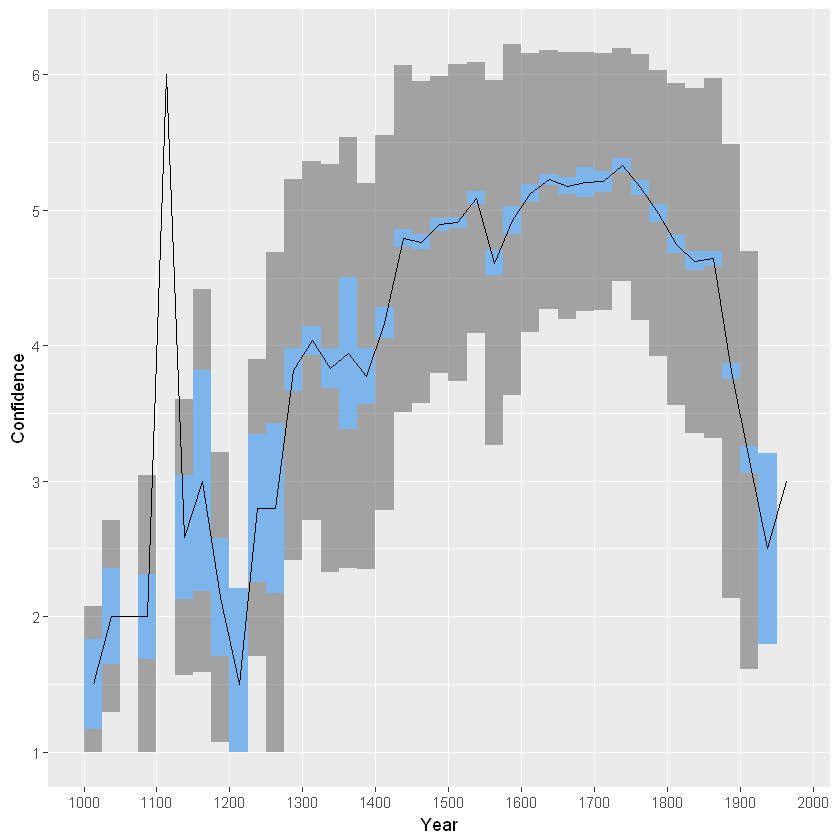

In [43]:
# computing mean estimate for each painting
paintings.conf <- results %>%
    dplyr::filter((Confidence > 0) & (year_unambiguous>1000)) %>%
    dplyr::group_by(local_filename) %>%
    dplyr::summarize(year= year_unambiguous[1],
                     confidence= mean(Confidence))

# binning paintings in time
paintings.conf$year.bin <- cut(paintings.conf$year, breaks = bins, labels =  FALSE)

# computing an binomial proportion and CI for each bin
confidence <- paintings.conf %>%
    dplyr::group_by(year.bin) %>%
    dplyr::summarize(mean.conf= mean(confidence),
                     sd.conf= sd(confidence),
                     serr.conf= sd(confidence)/sqrt(n()-1),
                     serr.lower= max(1, mean.conf-serr.conf),
                     serr.upper= min(7, mean.conf+serr.conf),
                     sd.lower= max(1, mean.conf-sd.conf),
                     sd.upper= min(7, mean.conf+sd.conf))

# plotting
confidence.plot <- ggplot(data= confidence, aes(x= year.bin, y= mean.conf, ymin= sd.lower, ymax= sd.upper))+
    geom_rect(aes(xmin= year.bin-0.5, xmax= year.bin+0.5), alpha= 0.5)+
    geom_rect(aes(xmin= year.bin-0.5, xmax= year.bin+0.5, ymin= serr.lower, ymax= serr.upper), alpha= 0.8, fill= '#72b8ffff')+
#     geom_errorbar(width= 1.0)+
    geom_line()+
    scale_x_continuous(breaks= i.larger.bins-0.5, labels = bins[i.larger.bins])+
    scale_y_continuous(breaks= 0:7)+
    xlab('Year') + 
    ylab('Confidence')+
    theme(panel.grid.minor.x = element_blank())

print(confidence.plot)
# ggsave(file="Generated figures/Chronology - confidence.pdf", plot= confidence.plot, width= 14, height= 6, units = 'cm')

## Estimates side
Figure 2D in the manuscript.

Warning message:
"Removed 1 rows containing missing values (geom_rect)."Warning message:
"Removed 1 rows containing missing values (geom_path)."

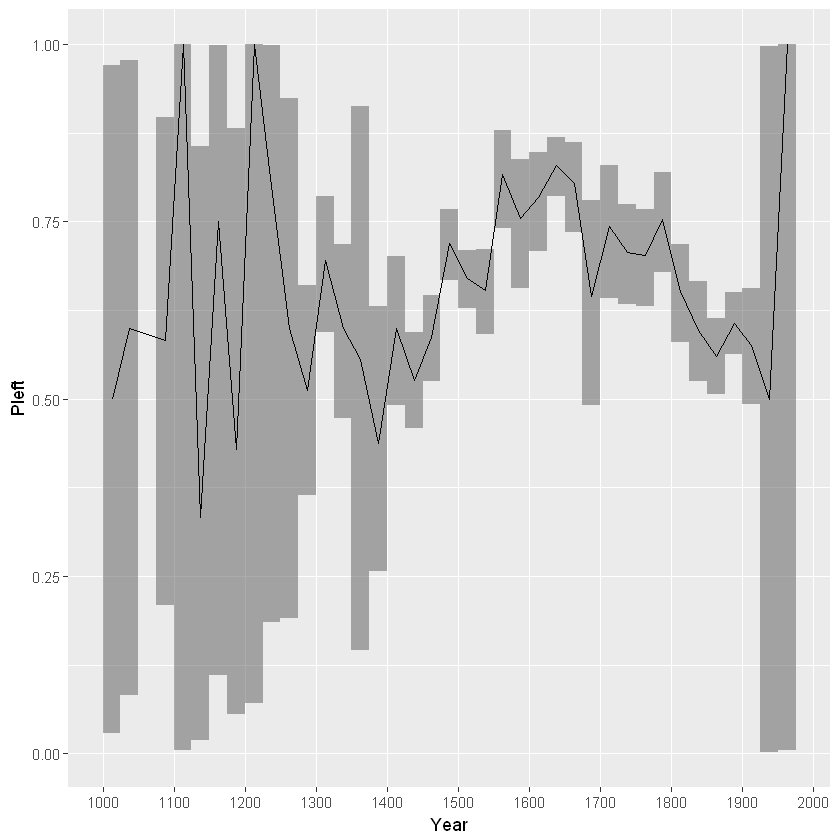

In [44]:
# binning paintings in time
paintings$year.bin <- cut(paintings$year, breaks = bins, labels =  FALSE)

# computing an binomial proportion and CI for each bin
estimate <- paintings %>%
    dplyr::group_by(year.bin) %>%
    dplyr::summarize(left.count= sum(estimate.side==-1),
                     P.left= left.count/n(),
                     CI.lower= binom::binom.exact(left.count, n(), conf.level = 0.99)$lower,
                     CI.upper= binom::binom.exact(left.count, n(), conf.level = 0.99)$upper)

# plotting
estimate.side.plot <- ggplot(data= estimate, aes(x= year.bin, y= P.left, ymin= CI.lower, ymax= CI.upper))+
    geom_rect(aes(xmin= year.bin-0.5, xmax= year.bin+0.5), alpha= 0.5)+
#     geom_errorbar(width= 1.0)+
    geom_line()+
    scale_x_continuous(breaks= i.larger.bins-0.5, labels = bins[i.larger.bins])+
    xlab('Year') + 
    ylab('Pleft')+
    theme(panel.grid.minor.x = element_blank())

print(estimate.side.plot)
# ggsave(file="Generated figures/Chronology - estimates.pdf", plot= estimate.side.plot, width= 6, height= 14, units = 'cm')